# INDRA Data Statistics
This notebook is intended to provide an overview over the following characteristics of the dataset:
1. Bar plot with types of relations (distribution on number of triples per relation type)
2. Number of triples WITH evidence (all of them are supposed to have?)
3. Number of triples WITH annotations per fine-tuning task in our “benchmark”
4. Class distribution per annotation type (with %)
5. Average token length per annotation and its length distribution (plot distribution)
6. Number of triples with MULTIPLE evidences (%) among the annotated ones

## Options for reading large json files
The regular json package just loads the entire file into memory. Ideally, we would want to avoid that, given that we're
dealing with large json files. Possible candidate packages to use are:
* ijson: https://pypi.org/project/ijson/
* json-streamer: https://github.com/kashifrazzaqui/json-streamer
* bigjson: https://github.com/henu/bigjson
* pybel

--> just use pybel for now, it's much easier anyways

## Imports and constants

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pybel

from pybel.constants import (
    ANNOTATIONS,
    EVIDENCE,
    RELATION,
    CITATION,
    INCREASES,
    DIRECTLY_INCREASES,
    DECREASES,
    DIRECTLY_DECREASES,
    REGULATES,
    BINDS,
    CORRELATION,
    NO_CORRELATION,
    NEGATIVE_CORRELATION,
    POSITIVE_CORRELATION,
    ASSOCIATION,
    PART_OF,
)

DIRECT_RELATIONS = {
    DIRECTLY_INCREASES,
    DIRECTLY_DECREASES,
    BINDS,
}

INDIRECT_RELATIONS = {
    REGULATES,
    CORRELATION,
    DECREASES,
    INCREASES,
    NO_CORRELATION,
    NEGATIVE_CORRELATION,
    POSITIVE_CORRELATION,
    ASSOCIATION,
    PART_OF,
}

UP_RELATIONS = {
    INCREASES,
    POSITIVE_CORRELATION,
    DIRECTLY_INCREASES
}

DOWN_RELATIONS = {
    DECREASES,
    NEGATIVE_CORRELATION,
    DIRECTLY_DECREASES
}

DUMMY_EXAMPLE_INDRA = os.path.join("../data/raw/", 'statements_2021-01-30-17-21-54.json')
INPUT_DIR = os.path.join("../data/", 'input/')

## Loading the Data

In [2]:
# Use pybel for processing the json
indra_kg = pybel.io.indra.from_indra_statements_json_file(DUMMY_EXAMPLE_INDRA)
indra_kg.summarize()

INFO: [2021-04-13 10:05:29] indra.assemblers.pybel.assembler - Skipping modification of type modification on agent EP300(mods: (modification))
INFO: [2021-04-13 10:05:29] indra.assemblers.pybel.assembler - Skipping modification of type modification on agent EP300(mods: (modification))
INFO: [2021-04-13 10:05:29] indra.assemblers.pybel.assembler - Skipping modification of type modification on agent EP300(mods: (modification))
INFO: [2021-04-13 10:05:29] indra.assemblers.pybel.assembler - Skipping modification of type modification on agent ERBB2(mods: (modification))
INFO: [2021-04-13 10:05:29] indra.assemblers.pybel.assembler - Skipping modification of type modification on agent BAX(mods: (modification))
INFO: [2021-04-13 10:05:30] indra.assemblers.pybel.assembler - Skipping modification of type sumoylation on agent AKT1(mods: (sumoylation, K, 276))
INFO: [2021-04-13 10:05:30] indra.assemblers.pybel.assembler - Skipping modification of type sumoylation on agent SMAD4(mods: (sumoylation,

INFO: [2021-04-13 10:05:30] indra.assemblers.pybel.assembler - Skipping modification of type modification on agent ERBB2(mods: (modification))
INFO: [2021-04-13 10:05:30] indra.assemblers.pybel.assembler - Skipping modification of type modification on agent FHIT(mods: (modification))
INFO: [2021-04-13 10:05:30] indra.assemblers.pybel.assembler - Skipping modification of type modification on agent PTEN(mods: (modification))
INFO: [2021-04-13 10:05:30] indra.assemblers.pybel.assembler - Skipping modification of type sumoylation on agent CDH1(mods: (sumoylation))
INFO: [2021-04-13 10:05:30] indra.assemblers.pybel.assembler - Skipping modification of type modification on agent TP53(mods: (modification))
INFO: [2021-04-13 10:05:30] indra.assemblers.pybel.assembler - Skipping modification of type modification on agent RUNX1(mods: (modification))
INFO: [2021-04-13 10:05:30] indra.assemblers.pybel.assembler - Skipping modification of type modification on agent RYR2(mods: (modification))
INFO: 

INFO: [2021-04-13 10:05:30] indra.assemblers.pybel.assembler - Skipping modification of type modification on agent BASP1(mods: (modification))
INFO: [2021-04-13 10:05:30] indra.assemblers.pybel.assembler - Skipping modification of type modification on agent PTEN(mods: (modification))
INFO: [2021-04-13 10:05:30] indra.assemblers.pybel.assembler - Skipping modification of type modification on agent PTEN(mods: (modification))
INFO: [2021-04-13 10:05:30] indra.assemblers.pybel.assembler - Skipping modification of type modification on agent PTEN(mods: (modification))
INFO: [2021-04-13 10:05:30] indra.assemblers.pybel.assembler - Skipping modification of type modification on agent PTEN(mods: (modification))
INFO: [2021-04-13 10:05:30] indra.assemblers.pybel.assembler - Skipping modification of type modification on agent PTEN(mods: (modification))
INFO: [2021-04-13 10:05:30] indra.assemblers.pybel.assembler - Skipping modification of type modification on agent BAX(mods: (modification))
INFO: 

INFO: [2021-04-13 10:05:31] indra.assemblers.pybel.assembler - Unhandled statement: Translocation(CTCF(), None, replication compartment)
INFO: [2021-04-13 10:05:31] indra.assemblers.pybel.assembler - Unhandled statement: Translocation(CTCF(), nucleoplasm, nucleolus)
INFO: [2021-04-13 10:05:31] indra.assemblers.pybel.assembler - Unhandled statement: Translocation(CASP8(), None, autophagosome)
INFO: [2021-04-13 10:05:31] indra.assemblers.pybel.assembler - Unhandled statement: Translocation(CASP8(), None, plasma membrane)
INFO: [2021-04-13 10:05:31] indra.assemblers.pybel.assembler - Unhandled statement: Translocation(CASP8(), cytoplasm, nucleus)
INFO: [2021-04-13 10:05:31] indra.assemblers.pybel.assembler - Unhandled statement: Translocation(CASP8(), cytosol, mitochondrion)
INFO: [2021-04-13 10:05:31] indra.assemblers.pybel.assembler - Unhandled statement: Translocation(CASP8(), mitochondrion, cytosol)
INFO: [2021-04-13 10:05:31] indra.assemblers.pybel.assembler - Unhandled statement: Tr

INFO: [2021-04-13 10:05:31] indra.assemblers.pybel.assembler - Unhandled statement: Translocation(ERBB2(), None, membrane)
INFO: [2021-04-13 10:05:31] indra.assemblers.pybel.assembler - Unhandled statement: Translocation(ERBB2(), None, mitochondrion)
INFO: [2021-04-13 10:05:31] indra.assemblers.pybel.assembler - Unhandled statement: Translocation(ERBB2(), None, nucleus)
INFO: [2021-04-13 10:05:31] indra.assemblers.pybel.assembler - Unhandled statement: Translocation(ERBB2(), plasma membrane, cytoplasm)
INFO: [2021-04-13 10:05:31] indra.assemblers.pybel.assembler - Unhandled statement: Translocation(ERBB3(), None, cell surface)
INFO: [2021-04-13 10:05:31] indra.assemblers.pybel.assembler - Unhandled statement: Translocation(ERBB3(), None, membrane)
INFO: [2021-04-13 10:05:31] indra.assemblers.pybel.assembler - Unhandled statement: Translocation(ERBB3(), None, nucleus)
INFO: [2021-04-13 10:05:31] indra.assemblers.pybel.assembler - Unhandled statement: Translocation(ERBB4(), None, nucleus

INFO: [2021-04-13 10:05:31] indra.assemblers.pybel.assembler - Unhandled statement: Translocation(RHOA(), cytosol, plasma membrane)
INFO: [2021-04-13 10:05:31] indra.assemblers.pybel.assembler - Unhandled statement: Translocation(RHOA(), nucleus, None)
INFO: [2021-04-13 10:05:31] indra.assemblers.pybel.assembler - Unhandled statement: Translocation(RHOA(), plasma membrane, cytosol)
INFO: [2021-04-13 10:05:31] indra.assemblers.pybel.assembler - Unhandled statement: Translocation(SMAD4(mods: (ubiquitination)), None, cytoplasm)
INFO: [2021-04-13 10:05:31] indra.assemblers.pybel.assembler - Unhandled statement: Translocation(SMAD4(), cytosol, nucleus)
INFO: [2021-04-13 10:05:31] indra.assemblers.pybel.assembler - Unhandled statement: Translocation(SMAD4(), nucleus, None)
INFO: [2021-04-13 10:05:31] indra.assemblers.pybel.assembler - Unhandled statement: Translocation(MAP2K4(), None, nucleus)
INFO: [2021-04-13 10:05:31] indra.assemblers.pybel.assembler - Unhandled statement: Translocation(M

---------------------  ------------------------------------
Name                   indra
Version                ab311a9d-8a10-4aa1-af1c-b7e5a4cb7284
Author                 INDRA
Number of Nodes        2939
Number of Namespaces   11
Number of Edges        20034
Number of Annotations  31
Number of Citations    10003
Number of Authors      0
Network Density        2.32E-03
Number of Components   13
Number of Warnings     0
---------------------  ------------------------------------

Type (4)             Count  Example
-----------------  -------  ---------------------------------------------------
Protein               1468  p(HGNC:7405 ! MT1X)
Complex               1071  complex(p(HGNC:11998 ! TP53), p(HGNC:13723 ! CTCF))
Abundance              318  a(PUBCHEM:"CID:25126798" ! "CID:25126798")
BiologicalProcess       82  bp(MESH:D042783 ! "Endothelial Cells")

Namespace (11)      Count  Example
----------------  -------  ----------------------------------------------------------------------

## Put everything in a dataframe

In [3]:
# Dump the entire data (as long as there is an evidence)
triple_text_pairs = []

# Context annotations 
context_annotations = {'organ': ['MeSHAnatomy'], 
                       'species': ['TAX_ID'], 
                       'disease': ['MeSHDisease', 'Disease'],
                       'cell_type': ['Cell'],
                       'cell_line': ['CellLine'],
                       'location': ['CellStructure']
                      }

# Iterate through the graph and infer a subgraph with edges that contain the annotation of interest
for u, v, data in indra_kg.edges(data=True):
    entry_dict = {
        'source': u,
        'relation': data[RELATION],
        'target': v,
        'evidence': data[EVIDENCE] if EVIDENCE in data else None,
        'pmid': data[CITATION] if CITATION in data else None,
    }
    
    # Look for annotations
    if ANNOTATIONS in data:
        # print(data[ANNOTATIONS].keys())
        
        # Go through every annotation type 
        for context_type in context_annotations.keys():
            # Handle diseases differently as there are two annotation fields 
            if context_type == 'disease':
                if context_annotations[context_type][0] in data[ANNOTATIONS]: 
                    entry_dict[context_type] = data[ANNOTATIONS][context_annotations[context_type][0]]
                elif context_annotations[context_type][1] in data[ANNOTATIONS]: 
                    entry_dict[context_type] = data[ANNOTATIONS][context_annotations[context_type][1]]
                else:
                    entry_dict[context_type] = None

            else: 
                entry_dict[context_type] = data[ANNOTATIONS][context_annotations[context_type][0]] \
                                           if context_annotations[context_type][0] in data[ANNOTATIONS] \
                                           else None
        entry_dict['stmt_hash'] = data[ANNOTATIONS]['stmt_hash'] if 'stmt_hash' in data[ANNOTATIONS] else None
    # If there are none, just add None for all class types
    else: 
        for context_type in context_annotations.keys():
            entry_dict[context_type] = None
            entry_dict['stmt_hash'] = None
            
    triple_text_pairs.append(entry_dict)
                
all_triple_text_pairs = pd.DataFrame(triple_text_pairs)

all_triple_text_pairs.head(n=50)
all_triple_text_pairs.to_csv(os.path.join(INPUT_DIR, 'all_triples.tsv'), sep='\t', index=False)

Read the data (so that it doesn't need to be generated in each run again)

In [4]:
all_triple_text_pairs = pd.read_csv(os.path.join(INPUT_DIR, 'all_triples.tsv'), sep='\t', index_col=None)

# Print the total number of triples 
print(f'Total number of triples: {len(all_triple_text_pairs)}')

Total number of triples: 20034


## 1. Bar plot with types of relations

Number of unique relations 6


Text(0, 0.5, 'Frequency')

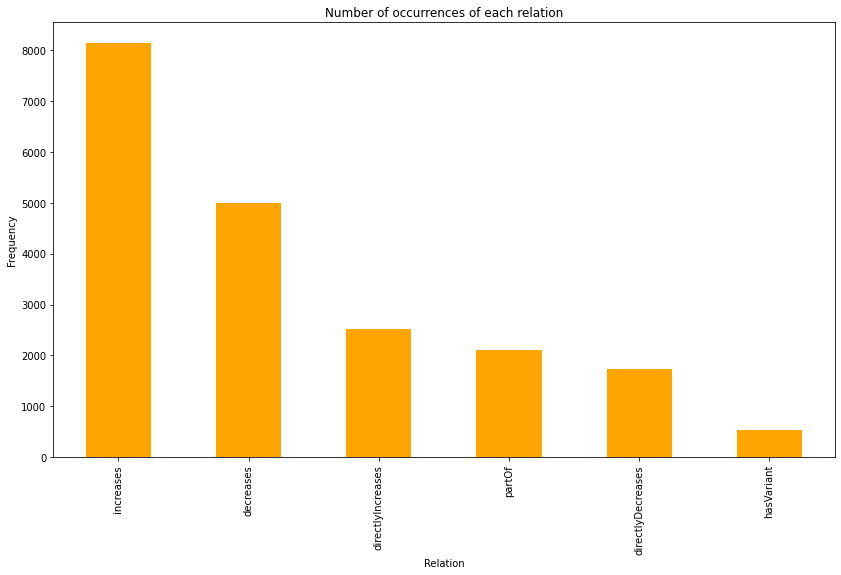

In [5]:
# Get the number of unique relations
print(f'Number of unique relations {len(np.unique(all_triple_text_pairs["relation"]))}')
# Print the frequencies of the different relations in a barchart, only plot the 20 most frequent ones
ax = all_triple_text_pairs['relation'].value_counts().sort_values(ascending=False)[:20].plot(kind='bar',
                                       figsize=(14,8),
                                       color='orange',
                                       title='Number of occurrences of each relation')
ax.set_xlabel('Relation')
ax.set_ylabel('Frequency')

## 2. Number of triples WITH evidence

In [19]:
# Filter by those entries that have evidence (and that don't have 'No evidence text.')
entries_with_evidence = all_triple_text_pairs[all_triple_text_pairs['evidence'] is not None and
                                           all_triple_text_pairs['evidence'] != 'No evidence text.']
# Print percentage
print(f'{len(entries_with_evidence)/len(all_triple_text_pairs) * 100} % ({len(entries_with_evidence)} many) \
of the triples have text evidence')

96.05670360387342 % (19244 many) of the triples have text evidence


## 3. Number of triples WITH annotations (and evidence) per fine-tuning task in our “benchmark”

## TODO: class-specific plots

Before any kind of minority class filtering: 

In [20]:
# Filter by those entries that have any type of annotation
entries_with_annotations = entries_with_evidence[entries_with_evidence.filter(
    ['cell_type', 'cell_line', 'species', 'disease', 'organ', 'location']).notna().any(axis=1)]

# Print percentage: entries with annotations (and evidence) from all entities
print(f'{len(entries_with_annotations)/len(all_triple_text_pairs) * 100} % ({len(entries_with_annotations)} many) \
of the triples have any type of annotation \n')

# For each annotation type (species etc.) check how many entries there are
for annotation_type in context_annotations: 
    print(f'Number of entries with a(n) {annotation_type} annotation BEFORE filtering: \
{len(entries_with_evidence[entries_with_evidence[annotation_type].notna()])}')
print('\n')


# Check number of direct/indirect relations
entries_direct = entries_with_evidence[entries_with_evidence["relation"].isin(DIRECT_RELATIONS)]
entries_indirect = entries_with_evidence[entries_with_evidence["relation"].isin(INDIRECT_RELATIONS)]

# Check number of up/down relations
entries_up = entries_with_evidence[entries_with_evidence["relation"].isin(UP_RELATIONS)]
entries_down = entries_with_evidence[entries_with_evidence["relation"].isin(DOWN_RELATIONS)]

print(f'Number of entries with direct/indirect relations: {len(entries_direct)}, {len(entries_indirect)}')
print(f'Number of entries with up/down relations: {len(entries_up)}, {len(entries_down)}')

7.062992912049516 % (1415 many) of the triples have any type of annotation 

Number of entries with a(n) organ annotation BEFORE filtering: 294
Number of entries with a(n) species annotation BEFORE filtering: 969
Number of entries with a(n) disease annotation BEFORE filtering: 449
Number of entries with a(n) cell_type annotation BEFORE filtering: 449
Number of entries with a(n) cell_line annotation BEFORE filtering: 449
Number of entries with a(n) location annotation BEFORE filtering: 449


Number of entries with direct/indirect relations: 3461, 15254
Number of entries with up/down relations: 10254, 6348


After filtering:

In [36]:
# Create class-specific dataframes 
class_specific_dfs = {}

# Filter out minority classes
for annotation_type in context_annotations.keys():
    label_counts = entries_with_annotations[annotation_type].value_counts().to_dict()
    
    # Labels are removed if they contain less than 5% of the (non-null) entries
    percentage = 0.05
    cutoff = int(entries_with_annotations[
        entries_with_annotations[annotation_type].notnull()].shape[0] * percentage)
    
    # Remove labels based on class count 
    labels_to_remove = {
        label: count
        for label, count in label_counts.items()
        if count < cutoff
    }
    
    # Get create class specific dictionaries by filtering out null values and the labels to remove
    class_specific_dfs[annotation_type] = entries_with_annotations[
        entries_with_annotations[annotation_type].notnull()][
        ~entries_with_annotations[annotation_type].isin(list(labels_to_remove.keys()))]
    
    
# Print the statistics
for annotation_type in context_annotations: 
    print(f'Number of entries with a(n) {annotation_type} annotation AFTER filtering: \
{len(class_specific_dfs[annotation_type])}')

Number of entries with a(n) organ annotation AFTER filtering: 294
Number of entries with a(n) species annotation AFTER filtering: 931
Number of entries with a(n) disease annotation AFTER filtering: 334
Number of entries with a(n) cell_type annotation AFTER filtering: 268
Number of entries with a(n) cell_line annotation AFTER filtering: 250
Number of entries with a(n) location annotation AFTER filtering: 437


<ipython-input-36-0f7f6b6aff08>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  class_specific_dfs[annotation_type] = entries_with_annotations[


In [8]:
entries_with_annotations[entries_with_annotations["location"].notnull()].head(n=100)

,source,relation,target,evidence,pmid,organ,species,disease,cell_type,cell_line,location,stmt_hash
1051,p(HGNC:11998 ! TP53),decreases,p(HGNC:5173 ! HRAS),Supplementary Figure 3 Cluster of upregulated ...,pubmed:15930270,{'Sputum': True},NaN,{'Head and Neck Neoplasms': True},{'fibroblast': True},{'NIH-3T3 cell': True},{'Cell Nucleus': True},{23973386916677342: True}
1849,"p(HGNC:11998 ! TP53, pmod(go:0006473 ! ""protei...",directlyIncreases,p(HGNC:11998 ! TP53),Fractionation of HeLa nuclear extracts and bio...,pubmed:10435622,{'Sputum': True},NaN,{'Head and Neck Neoplasms': True},{'fibroblast': True},{'BEWO cell': True},{'Golgi Apparatus': True},{-28562856004351640: True}
1850,"p(HGNC:11998 ! TP53, pmod(go:0006473 ! ""protei...",directlyIncreases,p(HGNC:11998 ! TP53),Phosphorylation of serine 15 increases the tra...,pubmed:11025670,{'Sputum': True},NaN,{'Head and Neck Neoplasms': True},{'fibroblast': True},{'BEWO cell': True},{'Golgi Apparatus': True},{-28562856004351640: True}
1851,"p(HGNC:11998 ! TP53, pmod(go:0006473 ! ""protei...",directlyIncreases,p(HGNC:11998 ! TP53),"In addition, treatment of cells with the PKC a...",pubmed:11431470,{'Sputum': True},NaN,{'Head and Neck Neoplasms': True},{'fibroblast': True},{'BEWO cell': True},{'Golgi Apparatus': True},{-28562856004351640: True}
1852,"p(HGNC:11998 ! TP53, pmod(go:0006473 ! ""protei...",directlyIncreases,p(HGNC:11998 ! TP53),The intrinsic transcriptional activity of p53 ...,pubmed:11546806,{'Sputum': True},NaN,{'Head and Neck Neoplasms': True},{'fibroblast': True},{'BEWO cell': True},{'Golgi Apparatus': True},{-28562856004351640: True}
...,...,...,...,...,...,...,...,...,...,...,...,...
17851,"p(HGNC:11998 ! TP53, var(""p.Ser241Thr""))",directlyDecreases,p(HGNC:11998 ! TP53),Table 2 p53 mutants unable to discriminate bet...,pubmed:11429705,NaN,NaN,{'prostate cancer': True},{'neuron': True},{'Hep G2 cell': True},{'Cell Nucleus': True},{19261435248408069: True}
17852,"p(HGNC:11998 ! TP53, var(""p.Cys242Tyr""))",directlyDecreases,p(HGNC:11998 ! TP53),Table 2 p53 mutants unable to discriminate bet...,pubmed:11429705,NaN,NaN,{'prostate cancer': True},{'neuron': True},{'Hep G2 cell': True},{'Cell Nucleus': True},{29496772811722178: True}
17853,"p(HGNC:11998 ! TP53, var(""p.Gly244Ser""))",directlyDecreases,p(HGNC:11998 ! TP53),Table 2 p53 mutants unable to discriminate bet...,pubmed:11429705,NaN,NaN,{'prostate cancer': True},{'neuron': True},{'Hep G2 cell': True},{'Cell Nucleus': True},{-6824451980439470: True}
17854,"p(HGNC:11998 ! TP53, var(""p.Gly245Asp""))",directlyDecreases,p(HGNC:11998 ! TP53),Table 2 p53 mutants unable to discriminate bet...,pubmed:11429705,NaN,NaN,{'prostate cancer': True},{'neuron': True},{'Hep G2 cell': True},{'Cell Nucleus': True},{9024607407283666: True}
